<a href="https://colab.research.google.com/github/srijac9/Machine-Learning-and-Data-Visualization-Course/blob/main/2024_01_01_Srija_Chitturi_CapstoneProject18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 18: Olivetti Faces Case-Study



---

## Instructions

### Goal of the Project:

From class 82 to class 90, you learned the following concepts:

 - Support Vector Machines - Introduction
 - Support Vector Machines - Hyperplane Visualisation II
 - Support Vector Machines - MNIST Digits Classification I
 - Support Vector Machines - MNIST Digits Classification II
 - Support Vector Machines - Regression

In this project, you will apply what you have learned in class 82 - 90 to achieve the following goals.

|||
|-|-|
|**Main Goal**|Create a Support Vector Machine classification model to identify the faces in the dataset.
|



---

### Context

Face Recognition, a highly active area in Artificial Intelligence, is used to identify the faces in photos, videos, or real-time. There are various applications of face recognition based on its purpose which can be on a small levels like a Mobile Phone or a high level like a Government Document. Some of them are:

- Authenticate services like face lock, attendance system.

- Management of Data like Census Management or on small level Mobile Phone Photo Gallery Management.



---

#### Getting Started


1. Follow the steps described below to solve the project:

2. Create the duplicate copy of the Colab file. Here are the steps to create the duplicate copy:

    - Click on the **File** menu. A new drop-down list will appear.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/0_file_menu.png' width=500>

    - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

      <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/1_create_colab_duplicate_copy.png' width=500>

     - After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_CapstoneProject18** format.

3. Now, write your code in the prescribed code cells.

---

### Problem Statement

The dataset contains a set of images taken between April 1992 and 1994 at AT&T Laboratories Cambridge.

The data includes ten different images of each of 40 distinct people. The images were taken at a different time and with varying lights, with different facial expression (open/closed eyes, smiling/not smiling) and with/without glasses. All the images were taken against a dark background with the people in an upright, frontal position.


The goal here is to train the SVM classification model to identify the recognise the labels (identifying the people) based on the images.


**Things To Do:**

1. Importing and Analysing the Dataset

2. Visualising the Images

3. Train-Test Split

4. Model Training and Prediction

5. Model Evaluation

----

### Dataset Description

The images are grayscale of size  $64 \times 64$ pixels. Each pixel is stored as a feature, hence we have $64 \times 64 = 4096$ feature columns with values in the interval of $[0, 1]$. Also, there is a target column which has labels from $0$ to $39$ indicating the identity of the people used as subjects. Some of the images of the subjects are:

<center><img src = 'https://s3-whjr-v2-prod-bucket.whjr.online/100a1d64-ab2a-4179-816d-2df298d36d54.png' width = 800></center>

**Dataset Link:** https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces

**Dataset Credits:**
```
AT&T Laboratories Cambridge
```


---

#### Activity 1:  Importing and Analysing the Dataset

In this activity, we have to load the dataset and analyse it.


**Perform the following tasks:**
- Load the feature dataset and target dataset into different DataFrames.

- Verify the number of rows and columns of both DataFrames.

- Merge the target DataFrame into the feature DataFrame and rename the column as a `target`.

- Print the information of the DataFrame and check null values.

- Verify the number of instances for each label.

---

**1.** Start with importing all the required modules:





In [ ]:
# Import modules
import pandas as pd

# Filter warnings


**2.** Create a Pandas DataFrame for the **Feature** dataset using the below link with `header=None`. Print first five rows of the DataFrame:

  **Feature Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/olivetti_X.csv

In [ ]:
# Load the Feature dataset into DataFrame.
features_df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/olivetti_X.csv", header=None)
features_df.head()

**3.** Create a Pandas DataFrame for the **Target** dataset using the below link with `header=None`. Print first five rows of the DataFrame:

  **Target Dataset Link:**  https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/olivetti_y.csv

In [ ]:
# Load the Target dataset into DataFrame.
target_df = pd.read_csv("https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/olivetti_y.csv", header=None)
target_df.head()

**4.** Verify the number of rows and columns in both of the DataFrame:

In [ ]:
# Print the number of rows and columns of both the DataFrame
print(features_df.shape)
print(target_df.shape)


(400, 4096)
(400, 1)


**Q.** Are the number of rows in target and feature DataFrame equal?

**A.** yes

**Q.** How many columns are there in feature and target DataFrame?

**A.** 4096 columns in the features dataframe, and 1 target column in the target dataframe

---



**5.** Merge the target DataFrame to the feature DataFrame as the last column naming it as the `target` column.

**6.** Print the number of rows and columns of the Feature DataFrame after merging. Print the first five rows of this DataFrame as well:

In [ ]:
# Merge the Feature and Target DataFrame

# Add `target` column in Feature DataFrame.
df = features_df.join(target_df, rsuffix = 'target')
df.rename(columns={'0target':'target'},inplace=True)
# Verify the number of rows and columns in Feature DataFrame
print(df.shape)
# Print first five rows
df.tail()

(400, 4097)


,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
395,0.400826,0.495868,0.570248,0.632231,0.648760,0.640496,0.661157,0.636364,0.665289,0.698347,...,0.396694,0.264463,0.099174,0.181818,0.243802,0.247934,0.161157,0.157025,0.136364,39
396,0.367769,0.367769,0.351240,0.301653,0.247934,0.247934,0.367769,0.512397,0.574380,0.628099,...,0.334711,0.289256,0.285124,0.338843,0.404959,0.458678,0.487603,0.512397,0.549587,39
397,0.500000,0.533058,0.607438,0.628099,0.657025,0.632231,0.657025,0.669421,0.673554,0.702479,...,0.148760,0.152893,0.161157,0.161157,0.173554,0.157025,0.177686,0.148760,0.190083,39
398,0.214876,0.219008,0.219008,0.223140,0.210744,0.202479,0.276859,0.400826,0.487603,0.549587,...,0.392562,0.367769,0.409091,0.479339,0.524793,0.545455,0.574380,0.590909,0.603306,39
399,0.516529,0.462810,0.280992,0.252066,0.247934,0.367769,0.574380,0.615702,0.661157,0.615702,...,0.264463,0.293388,0.301653,0.293388,0.322314,0.322314,0.359504,0.355372,0.384298,39


**Q.** How many rows and columns are there in the new merged Feature DataFrame?

**A.** 400

---

**6.** Print the labels in the target column and their distribution:

In [ ]:
# Check the distribution of the labels in the target column.
df['target'].value_counts()

0     10
1     10
22    10
23    10
24    10
25    10
26    10
27    10
28    10
29    10
30    10
31    10
32    10
33    10
34    10
35    10
36    10
37    10
38    10
21    10
20    10
19    10
9     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
10    10
18    10
11    10
12    10
13    10
14    10
15    10
16    10
17    10
39    10
Name: target, dtype: int64

**Q.** How many labels are there in the target column?

**A.** 39

**Q.** Which target label has more records?

**A.** They all have equal records

**After performing this activity, you must obtain the DataFrame with feature columns and the target column identified.**

---

#### Activity 2: Visualising the Images

In this activity, you need to visualise exactly one sample image  for all the unique labels by grouping.

**Steps: (Learned in "Lesson 87: Support Vector Machines - MNIST Digits Classification II, Activity 4: Visualising Digits")**

**1.** Create a group object of the DataFrame and store it in a variable.

**2.** Create a Python function that takes the label as input for which one sample image needs to be created and returns the corresponding image as an output. Let's refer to this input value by the `label_in_grouped_df` variable.

**3.** Get a data frame containing the pixel values of all the images for a label (referred to as `label_in_grouped_df`).

**4.** For this label (referred to as `label_in_grouped_df`), get the row number of its first sample in the `df` DataFrame.

**5.** Create a 2D NumPy array of $64 \times 64$ for the pixel values of this sample image for the label.

**6.** Use the NumPy array to create the required image.



In [ ]:
# Create a Python function to visualise exactly one sample image of a label that exists in the 'df' DataFrame.

# Create the group object of the DataFrame
import matplotlib.pyplot as plt

grouped_df = df.groupby(by='target')

# Define the function to visualise the images
def visualize(label):
  # Get the group for the input label
  label_group_df = grouped_df.get_group(label)
  # Get the row number of the first instance in the group
  first_label = label_group_df.index.values[0]
  # Get the data of the row number selected # Reshape the data into a 2D array of 64 x 64.
  labels_array = df.iloc[first_label, 1:].values.reshape(64, 64)
  # Create the image
  plt.figure(figsize = (8, 8), dpi = 100)
  plt.title(f"Subject {label}", fontsize = 15)
  plt.imshow(labels_array, cmap='gray', vmin = 0, vmax = 1)
  plt.show()

**7.** After creating the Python function, use a `for` loop to generate numbers from 0 to 39 (including both) and then create one sample image that exists in the `df` data frame corresponding to these labels:


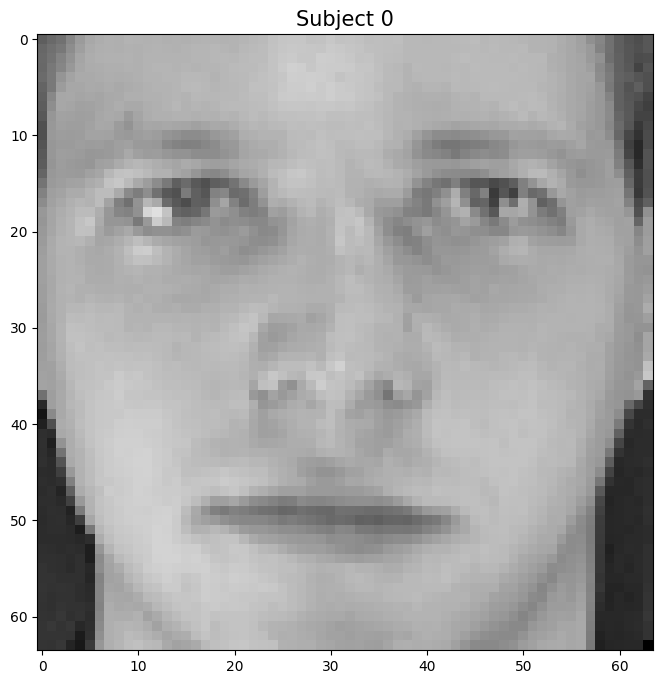

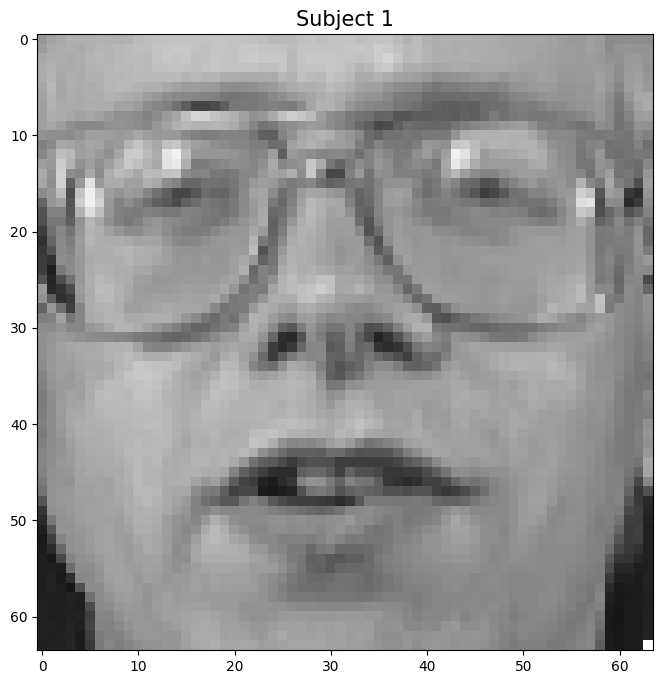

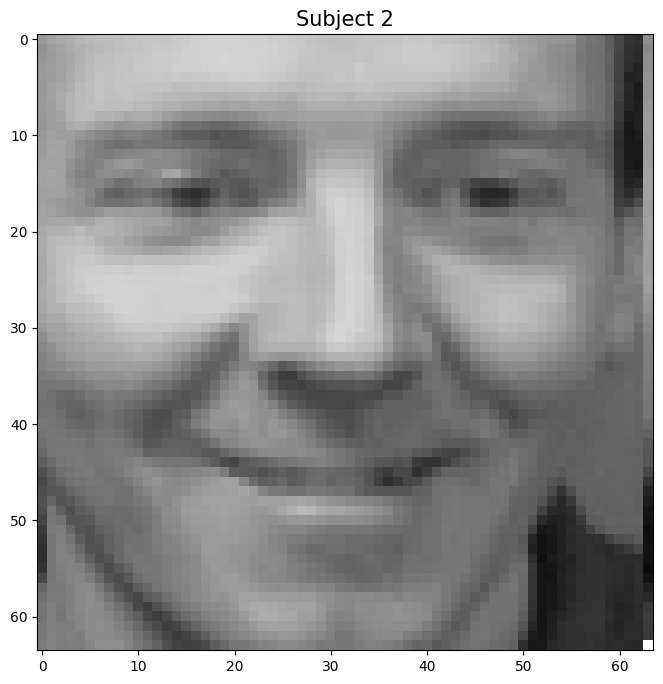

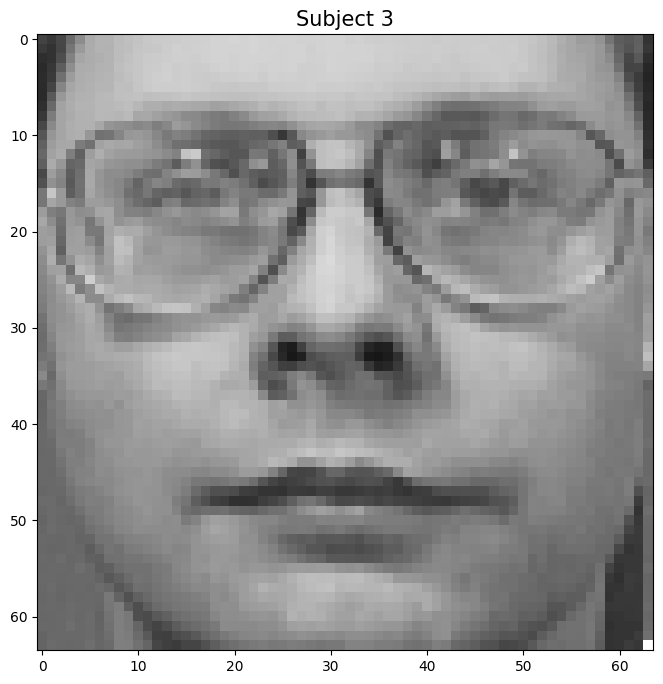

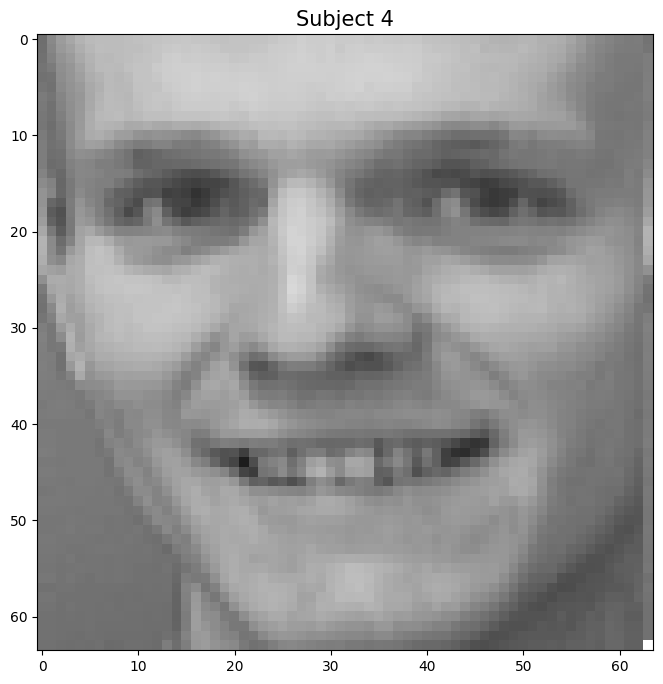

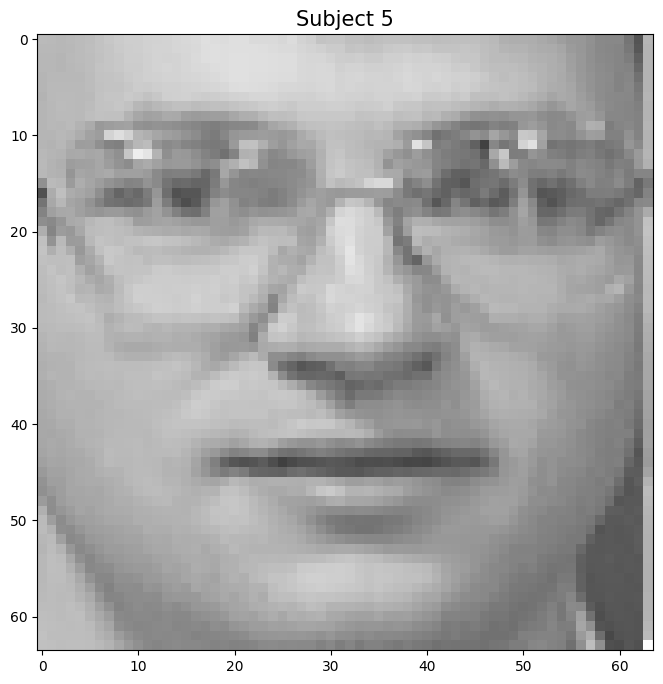

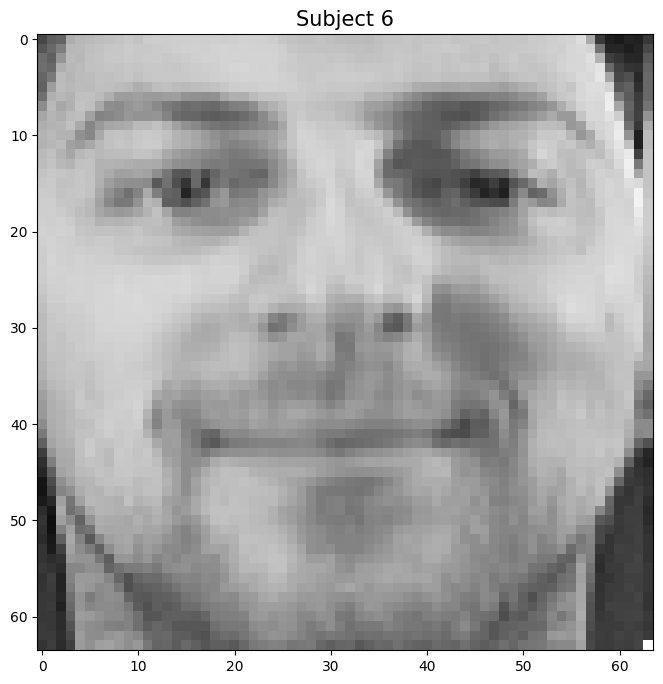

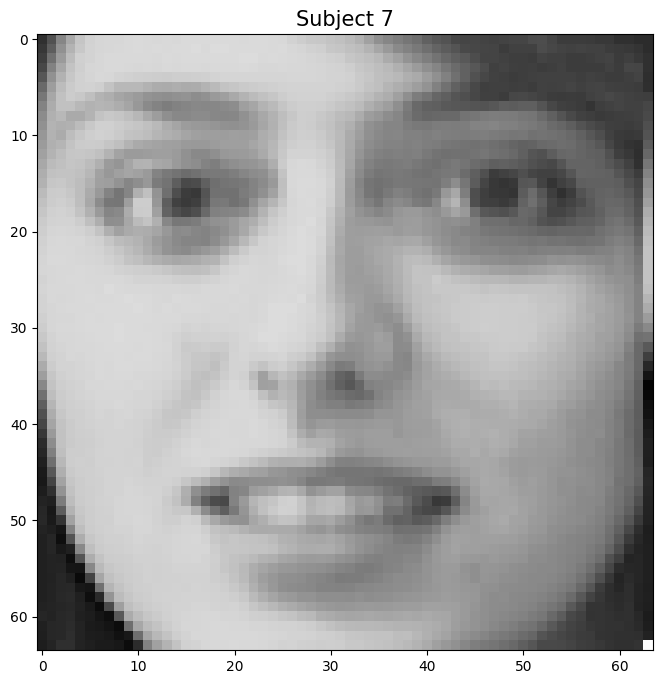

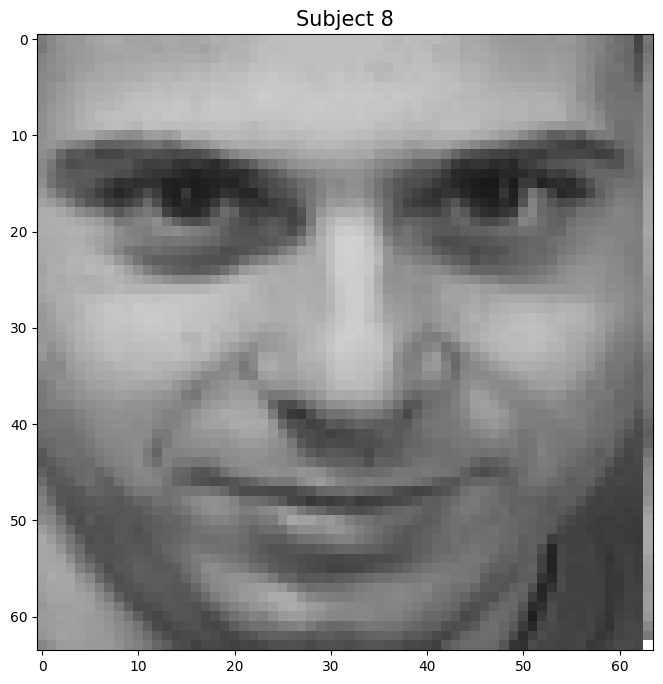

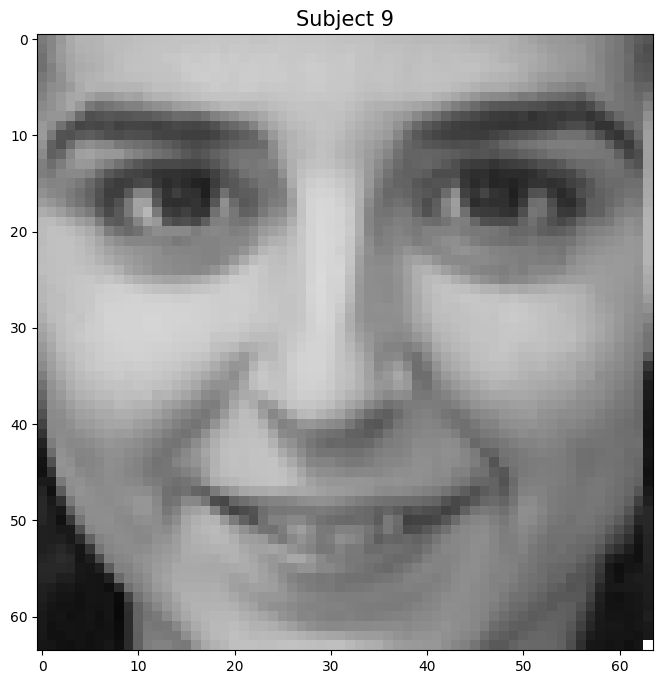

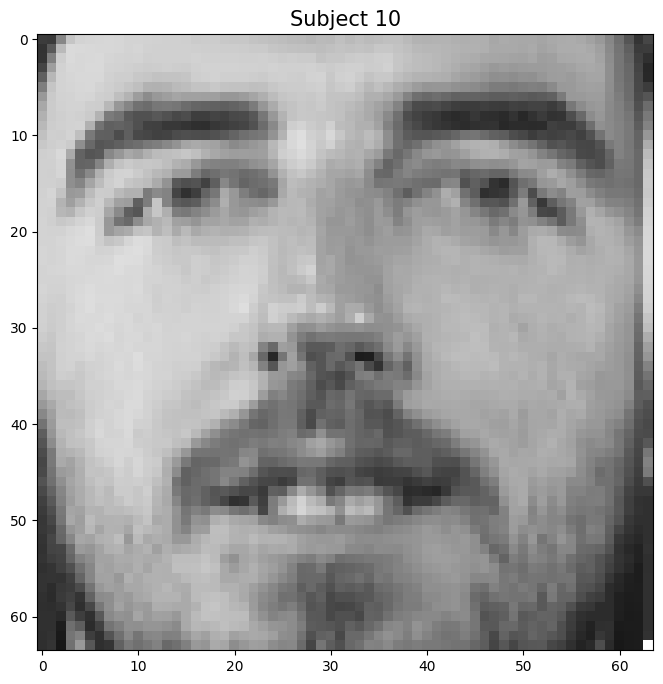

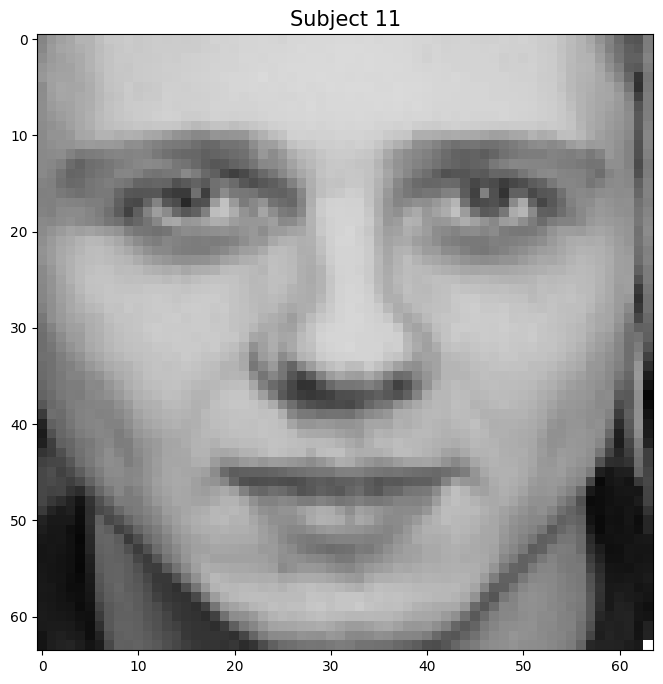

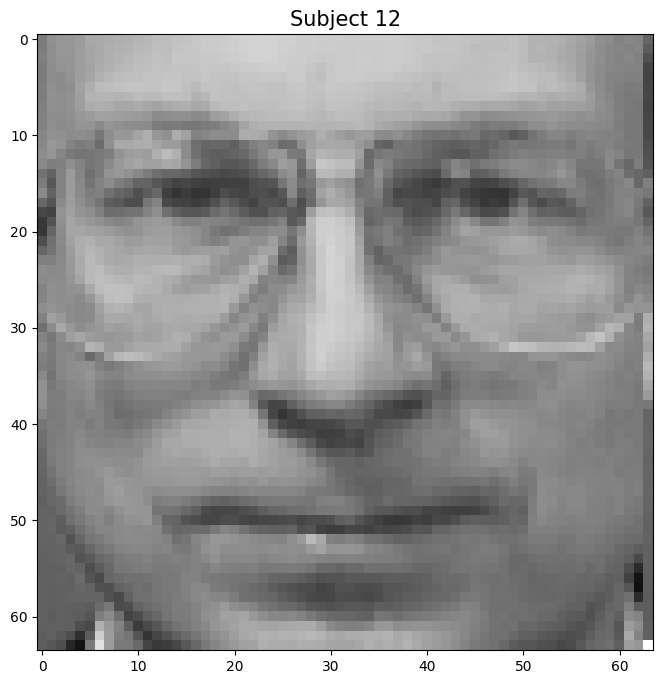

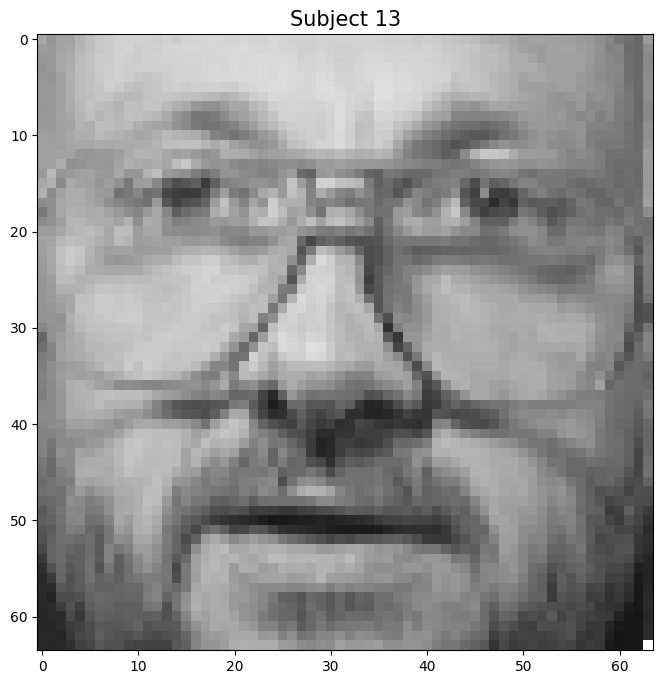

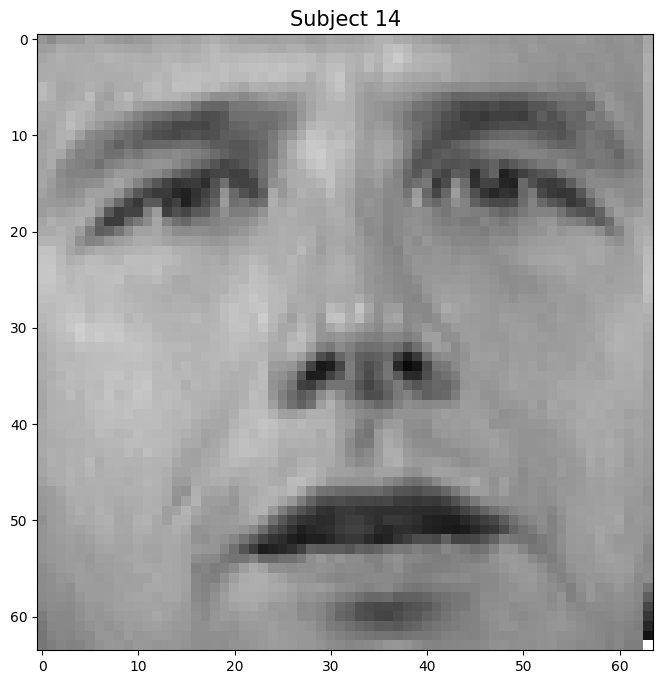

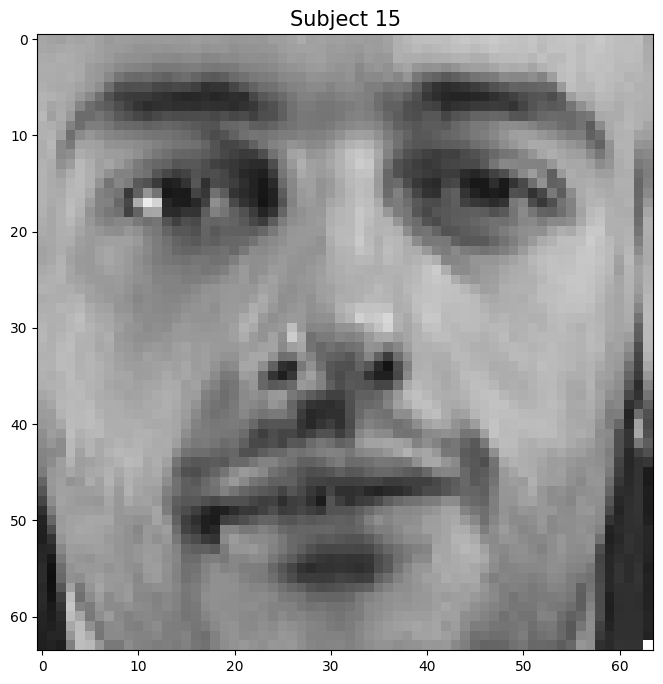

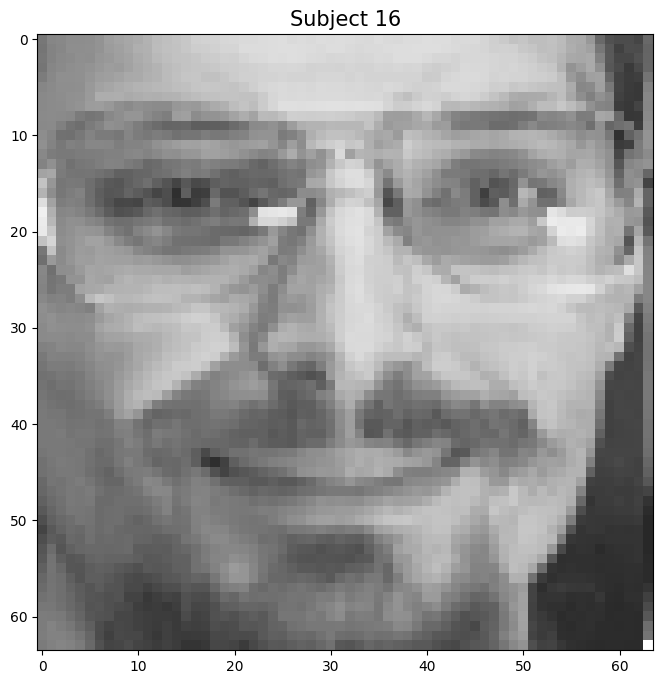

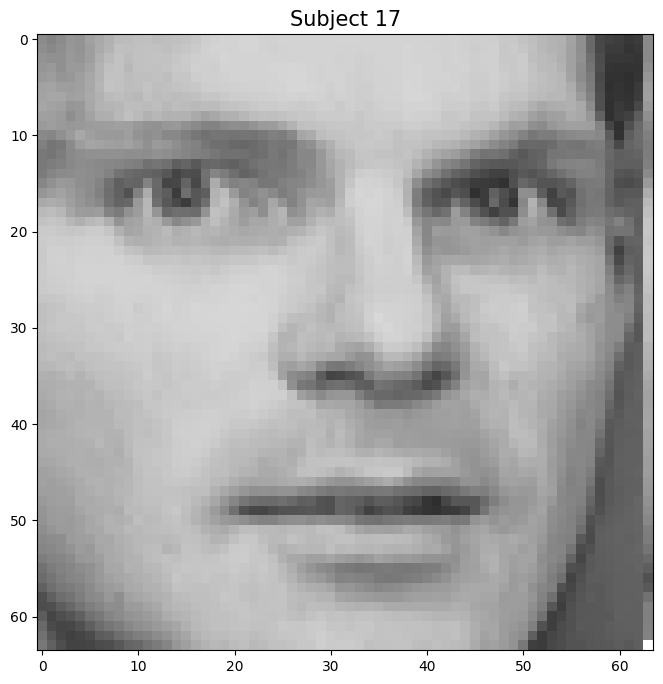

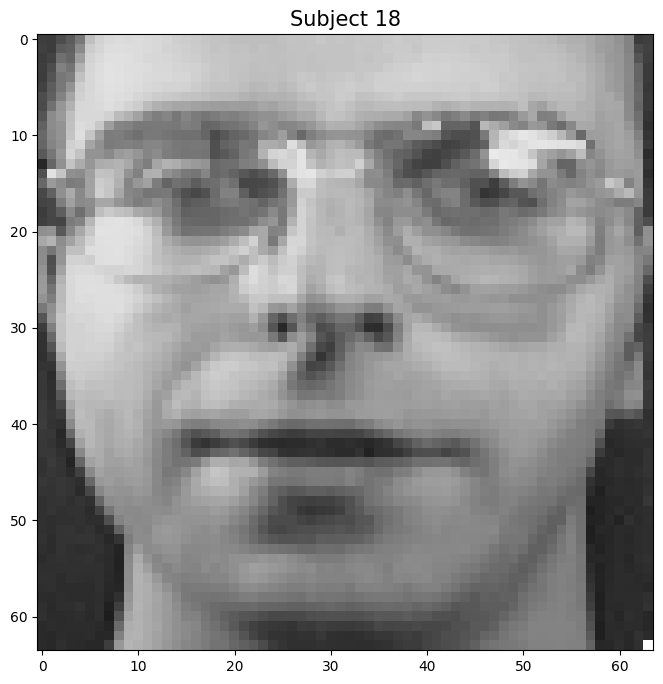

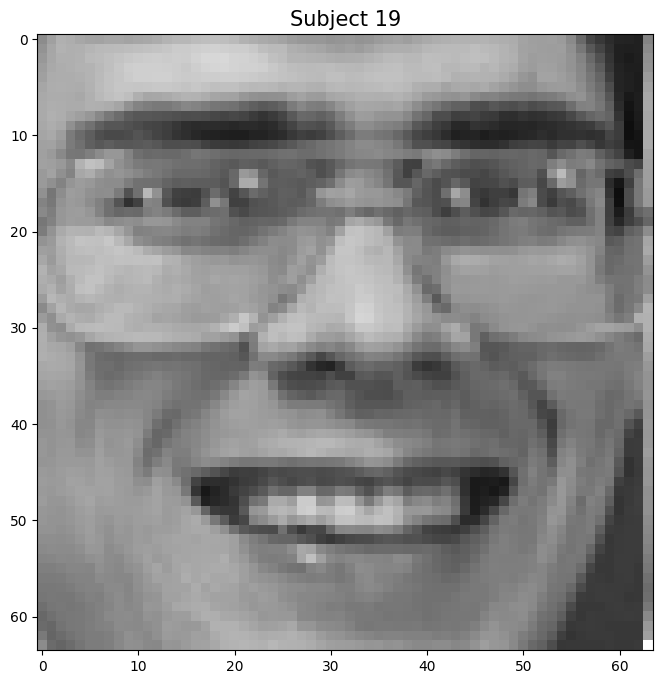

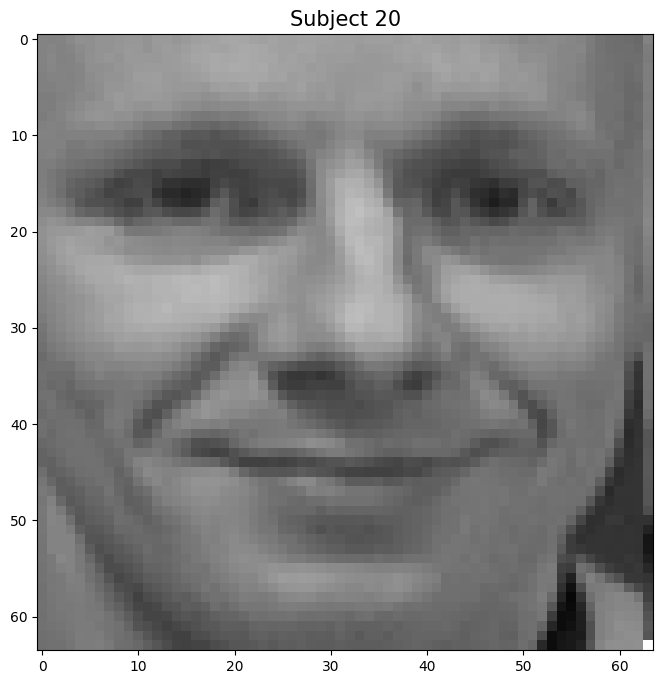

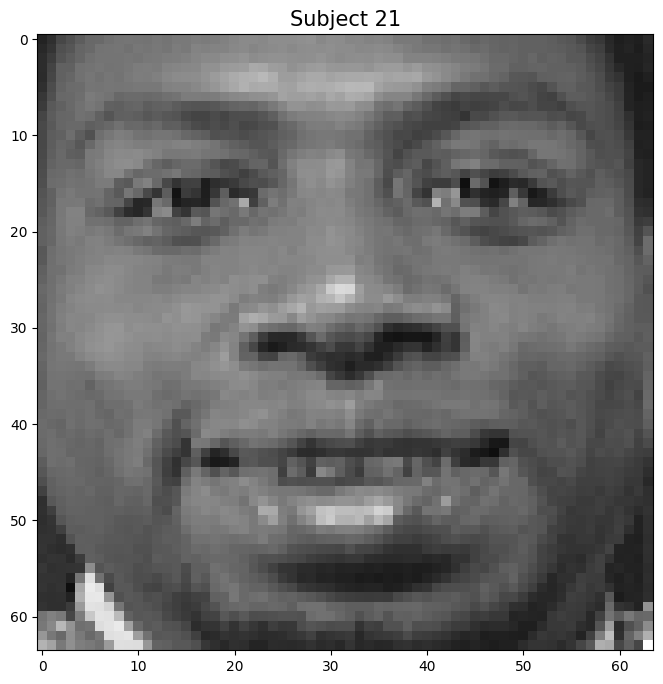

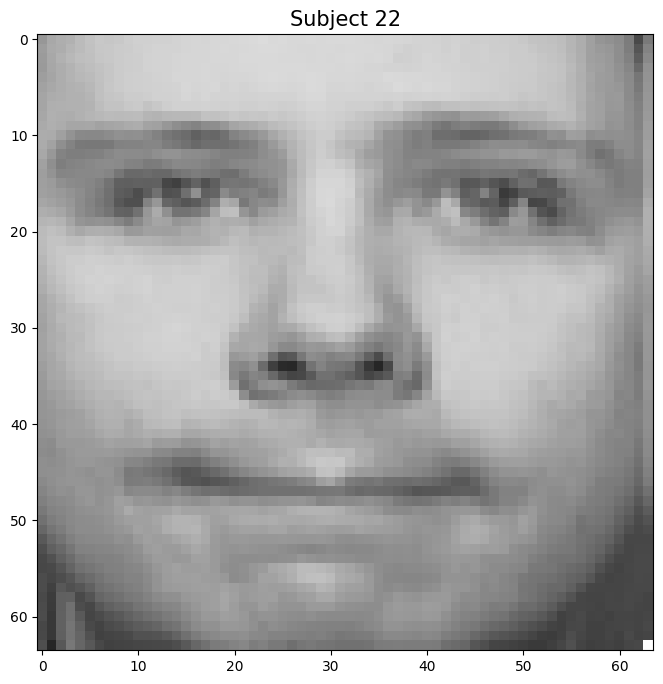

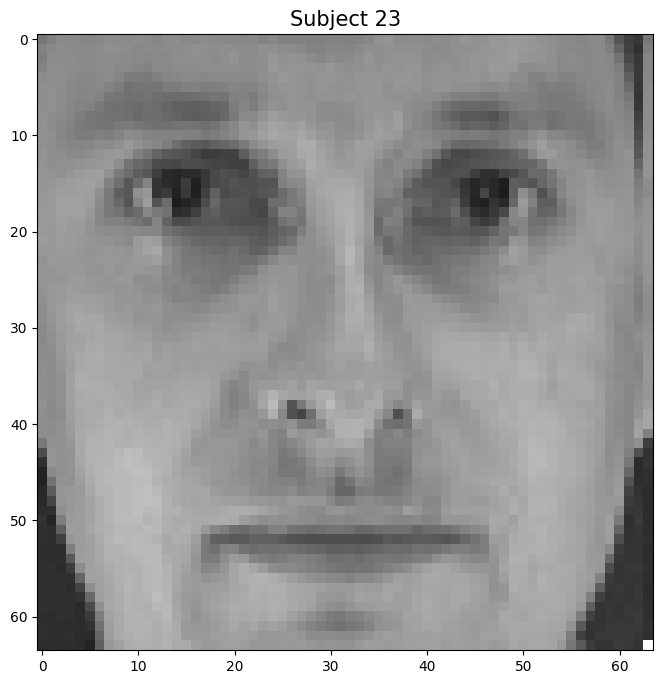

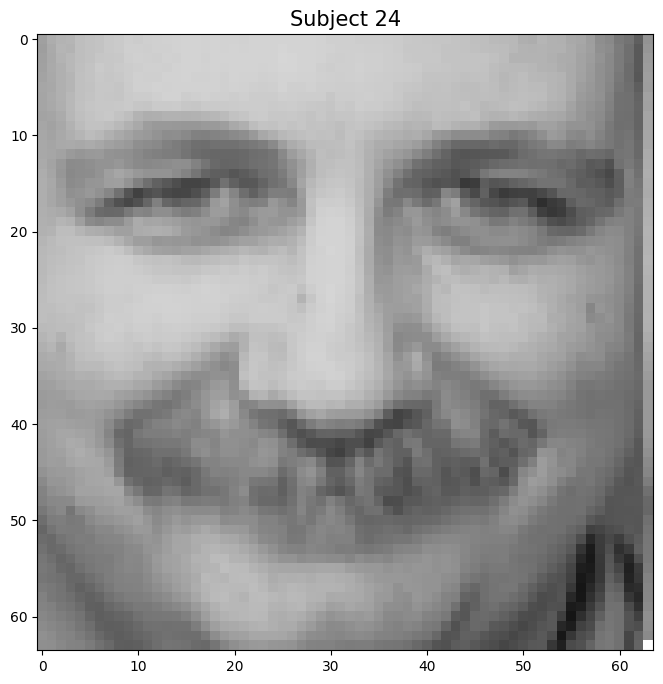

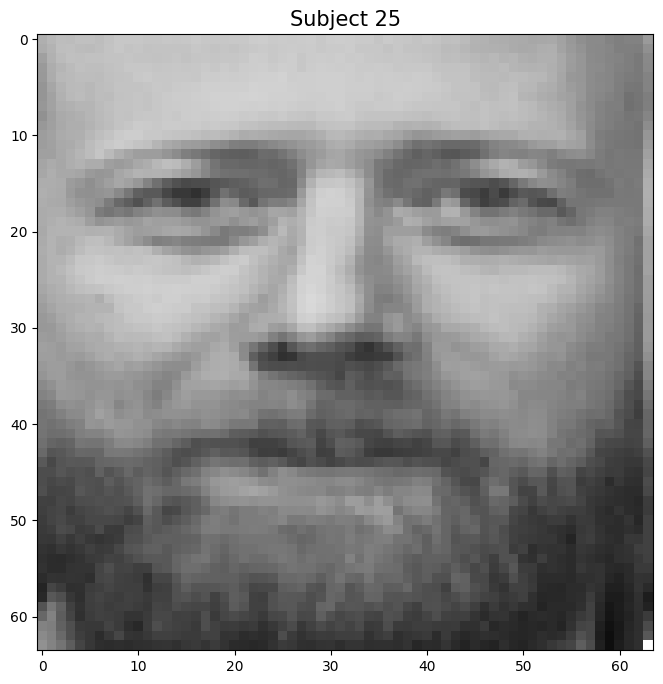

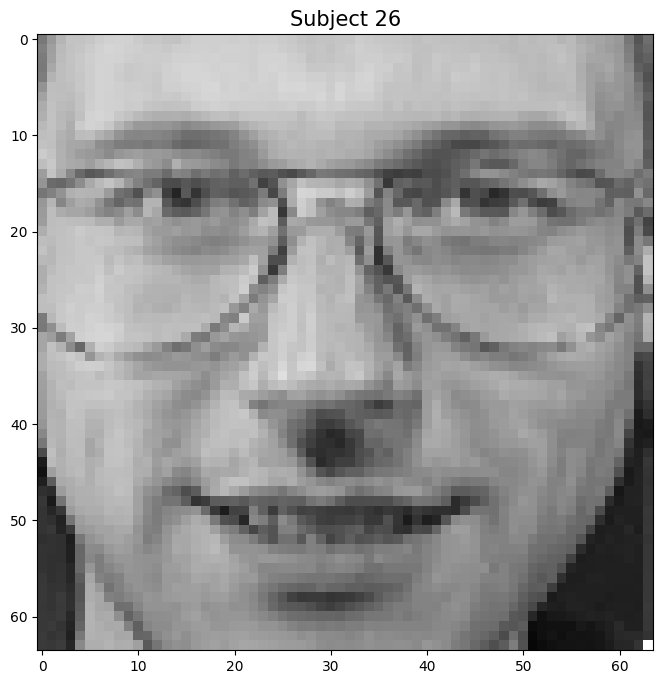

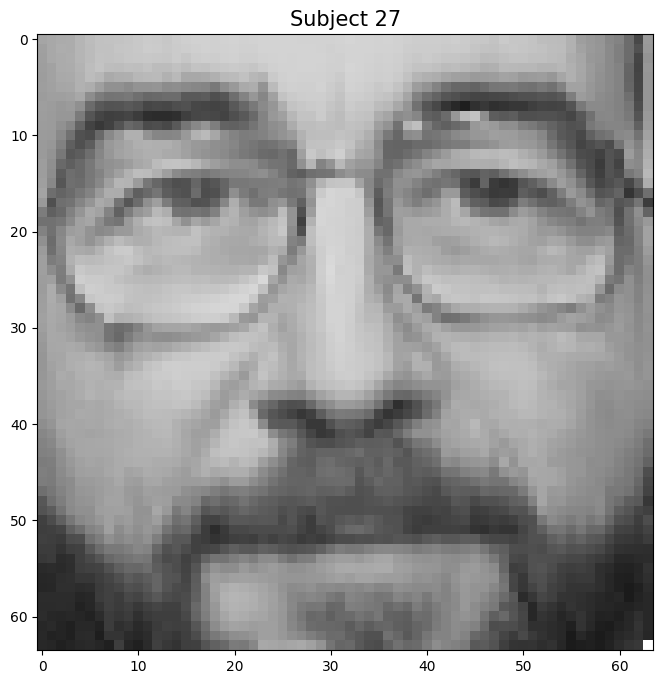

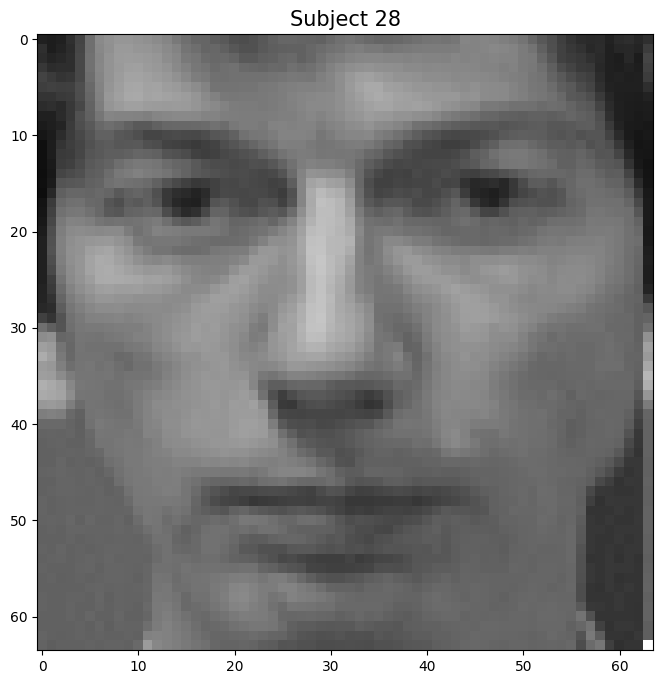

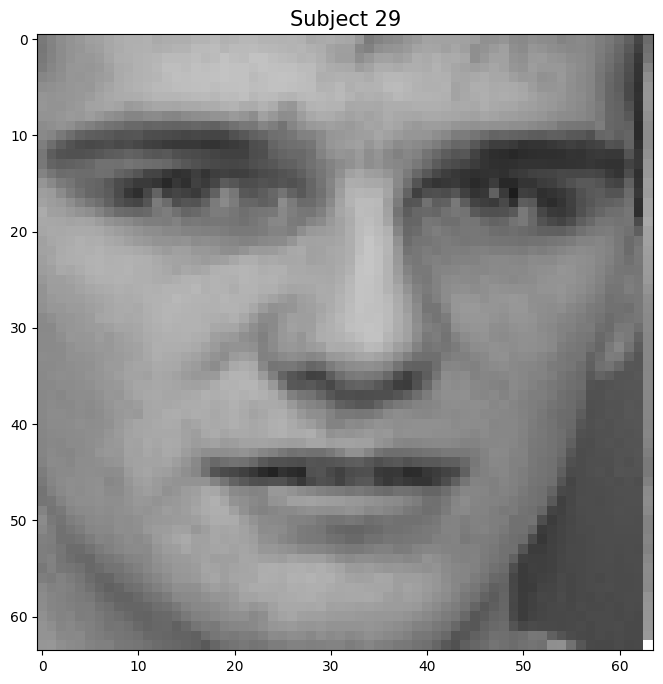

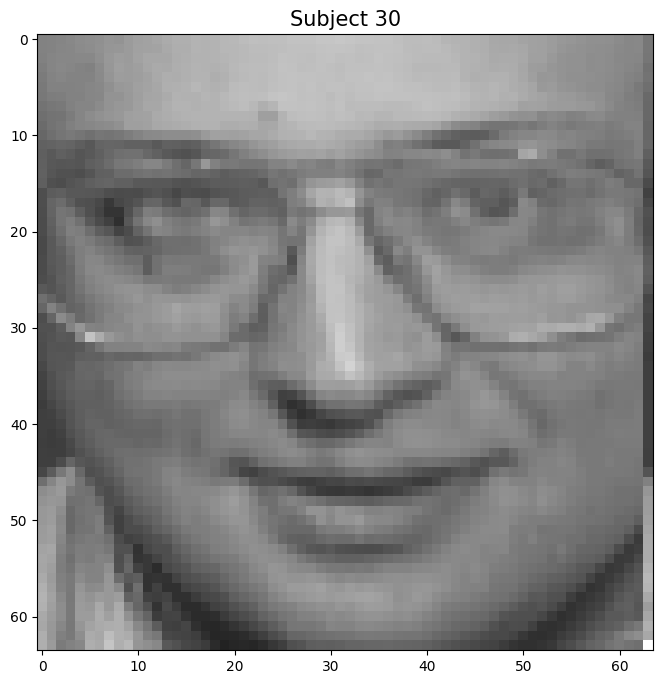

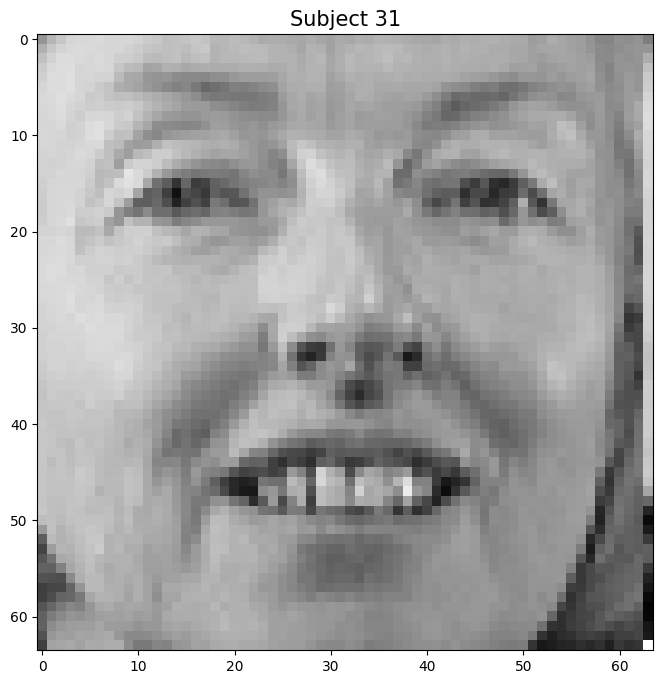

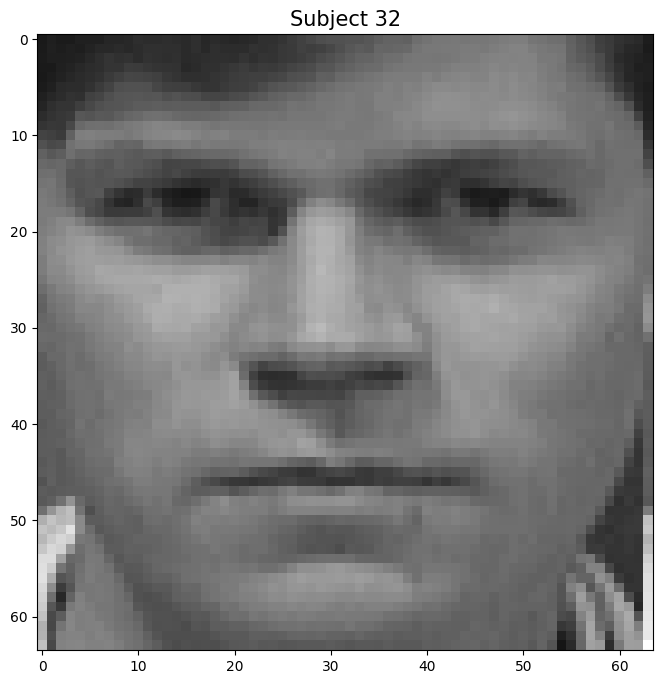

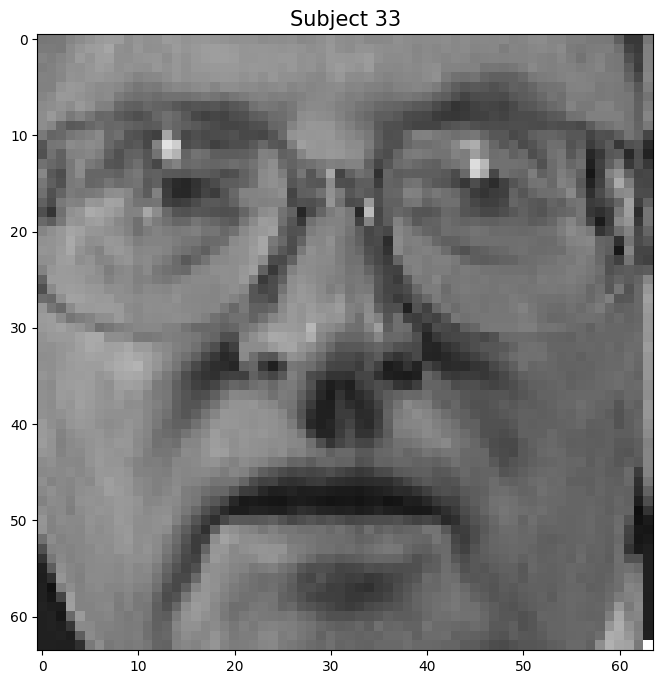

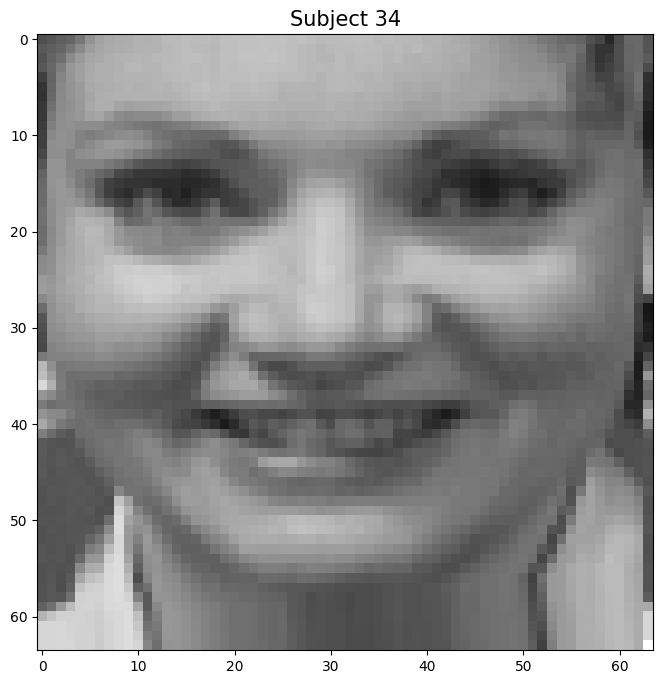

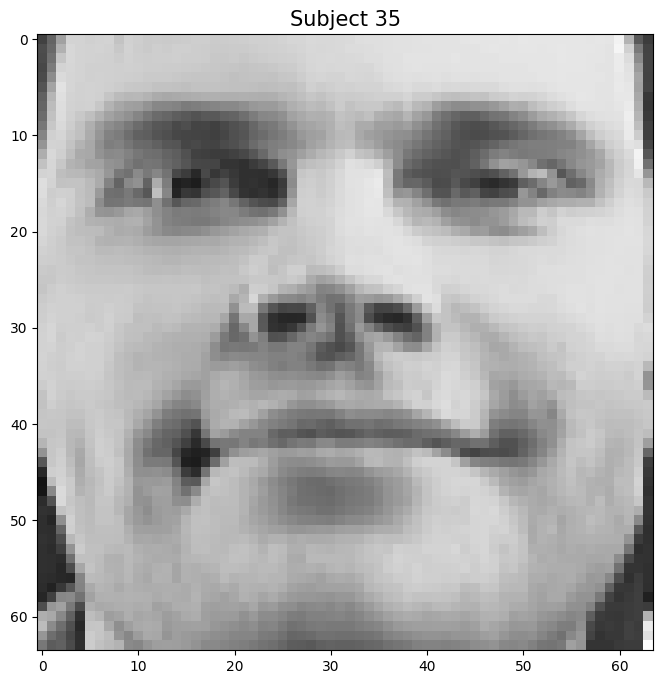

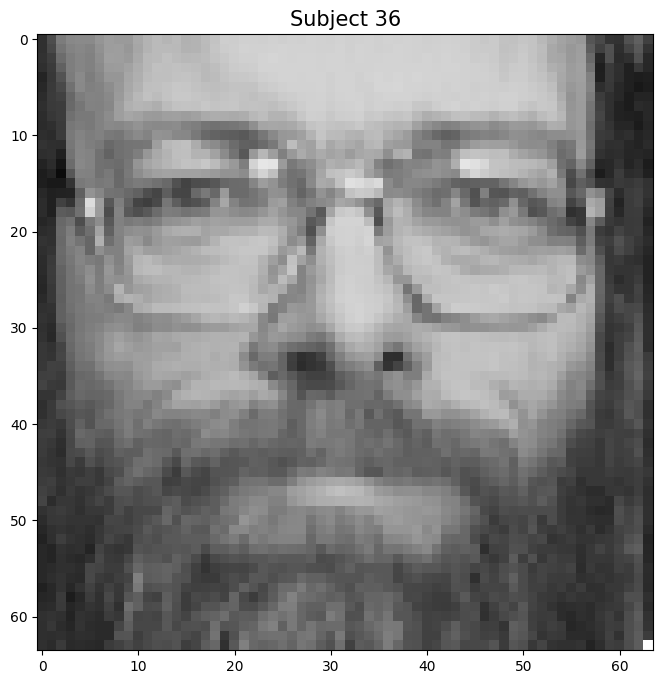

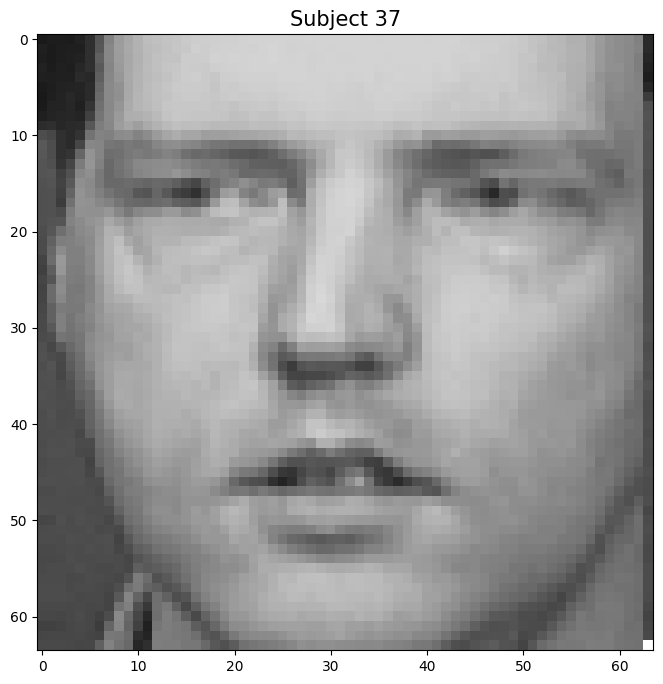

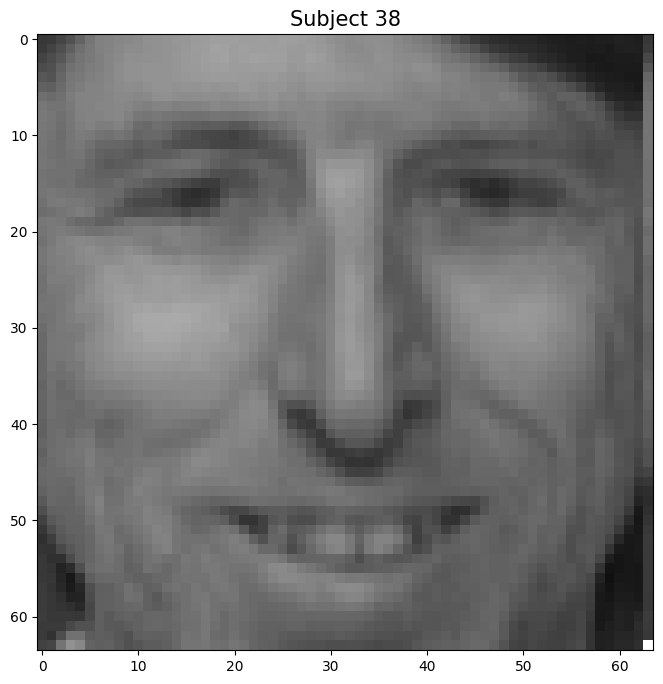

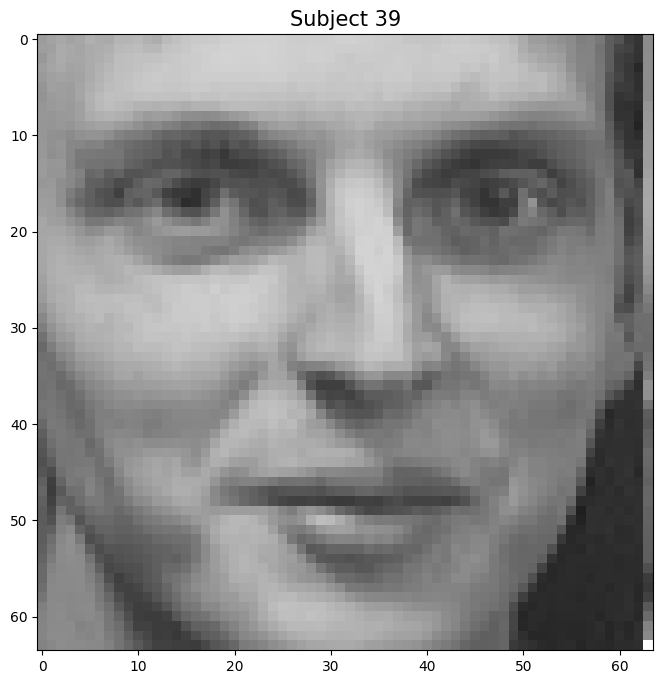

In [ ]:
# Call the function to create the images.
for i in range(0,40):
  visualize(i)


**After this activity, exactly one image of every label should be visualised.**

----

#### Activity 3: Train-Test Split

You need to classify the labels in the `target` variable, using other variables. Thus, the `target` is the target or dependent variable and other columns except `target` are the features or the independent variables.

**1.** Split the dataset into the training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

**2.** Set `random_state = 42`.

In [ ]:
# Split the training and testing data

# Import the module
from sklearn.model_selection import train_test_split
# Create the feature and target variables
df.columns = df.columns.astype(str)
features = df[df.columns[:-1]]
target = df['target']
# Split the feature and target arrays
x_train,x_test,y_train,y_test = train_test_split(features, target, test_size = 0.3, random_state= 42)

**3.** Print the number of rows and columns in the training and testing set:

In [ ]:
# Print the shape of all the four variables i.e. 'X_train', 'X_test', 'y_train', and 'y_test'
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 4096)
(120, 4096)
(280,)
(120,)


**After this activity, the feature and target data should be distributed in training and testing data**

---

#### Activity 4: Model Training and Prediction

Implement SVM classification using the `sklearn` module in the following way:

**1.** Deploy the model by importing the `SVC` class.

**2.** Create an object of the `SVC` class and pass `kernel = "linear"` as input to its constructor.

**3.** Call the `fit()` function of the `SVC` class on the object created and pass `X_train` and `y_train` as inputs to the function.

**4.** Call the `score()` function with `X_train` and `y_train` as inputs to check the accuracy score of the model.


In [ ]:
# Build a logistic regression model using the 'sklearn' module.
from sklearn.svm import SVC

# 1. Create the SVC model and pass 'kernel=linear' as input.
svc_model = SVC(kernel='linear')
# 2. Call the 'fit()' function with 'X_train' and 'y_train' as inputs.
svc_model.fit(x_train,y_train)
# 3. Call the 'score()' function with 'X_train' and 'y_train' as inputs to check the accuracy score of the model.
svc_model.score(x_train,y_train)

1.0

**5.** Make the predictions on the train set using `predict()` function:

In [ ]:
# Make predictions on the train dataset by using the 'predict()' function.
pred = svc_model.predict(x_train)
# Print the occurrence of each label computed in the predictions.
pred = pd.DataFrame(pred)
pred.value_counts()

16    10
31     9
21     9
19     9
20     8
35     8
25     8
33     8
34     8
18     8
12     8
30     8
2      8
8      8
36     8
10     7
4      7
27     7
37     7
24     7
32     7
6      7
5      7
13     7
17     7
9      7
15     7
29     7
14     7
39     6
28     6
26     6
23     6
22     6
1      6
3      6
11     5
0      5
38     3
7      2
dtype: int64

**6.** Make predictions on the test dataset by using the `predict()` function:


In [ ]:
# Make predictions on the test dataset.
test_pred = svc_model.predict(x_test)
# Print the occurrence of each label computed in the predictions.
test_pred = pd.DataFrame(test_pred)
test_pred.value_counts()

38    8
7     7
11    5
39    4
1     4
22    4
23    4
26    4
29    4
3     4
17    4
28    3
27    3
32    3
34    3
24    3
37    3
0     3
6     3
15    3
14    3
13    3
4     3
10    3
9     3
5     3
8     2
2     2
36    2
35    2
33    2
20    2
30    2
18    2
12    2
25    2
31    1
21    1
19    1
dtype: int64



**After this activity, an SVM model should be trained and values of the labels should be predicted for the target columns for multiclass classification.**

----

#### Activity 5: Model Evaluation

**1.** Create a confusion matrix to calculate true positives, false positives, true negatives, and false negatives for the **training dataset** to evaluate the SVC linear model. Store the confusion matrix in a DataFrame.

**2.** Create a heatmap for the training confusion matrix DataFrame:

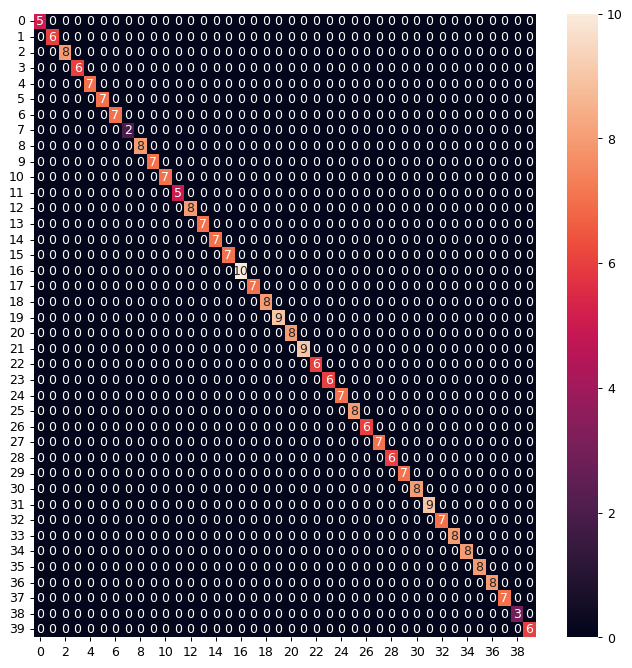

In [ ]:
# Create the confusion matrix heatmap for the training dataset predictions

# Import the module
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Create the training confusion matrix DataFrame
cm_train = pd.DataFrame(confusion_matrix(y_train, pred))
# Create the heatmap
plt.figure(figsize = (9, 9), dpi = 90)
sns.heatmap(cm_train, annot = True)
plt.show()

**Hint:** Since there are a lot of labels (40), keep the height of the graph $>=10$

---

**3.** Print the classification report for the training predictions:

In [ ]:
# Print the classification report for the training predictions.
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         7
          16       1.00      1.00      1.00        10
          17       1.00    

**Q.** What is the lowest f1-score? Which label has the lowest f1-score in the training dataset predictions?

**A.** None, they all have 1.00 F1-score

---

**4.** Create a confusion matrix DataFrame for the **testing dataset** to evaluate the SVC linear model.

**5.** Create a heatmap for the testing confusion matrix DataFrame.

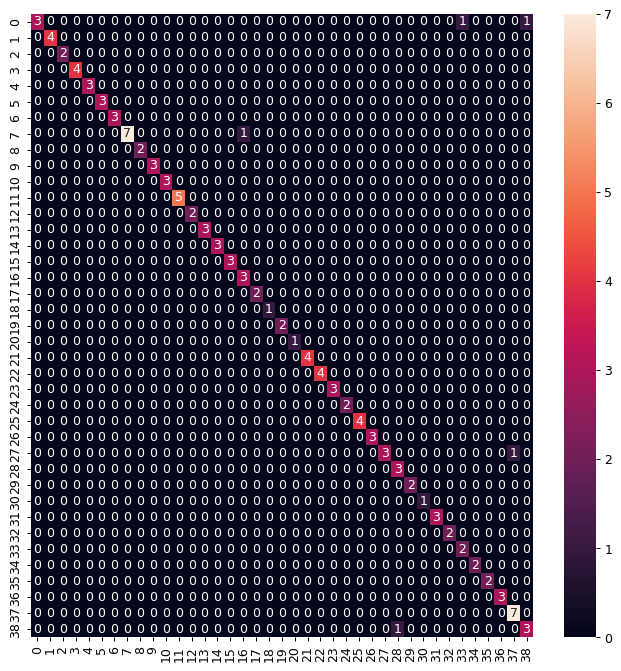

In [ ]:
# Create the confusion matrix heatmap for the testing dataset predictions

# Create the testing confusion matrix DataFrame
cm_test = pd.DataFrame(confusion_matrix(y_test, test_pred))
# Create the heatmap
plt.figure(figsize = (9, 9), dpi = 90)
sns.heatmap(cm_test, annot = True)
plt.show()


**6.** Print the classification report for the testing predictions:

In [ ]:
# Print the classification report for the testing predictions.
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.88      0.93         8
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          17       0.75      1.00      0.86         3
          18       1.00    

**Q.** What is the lowest f1-score? Which label has the lowest f1-score in the testing dataset predictions?

**A.** The lowest F1-score is 0.75, both label 39 and label 0 have a score of 0.75






**After this activity, the model should be evaluated for the target columns using the test features set.**

----

### Submitting the Project

Follow the steps described below to submit the project.

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>


3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_CapstoneProject18**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_CapstoneProject18** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>


---